# Sobre o conjunto de dados

A doença por coronavírus (COVID-19) é uma doença infecciosa causada pelo vírus SARS-CoV-2.

A maioria das pessoas infectadas com o vírus experimentará doenças respiratórias leves a moderadas e se recuperará sem a necessidade de tratamento especial. No entanto, alguns ficarão gravemente doentes e precisarão de atenção médica. Pessoas idosas e aqueles com condições médicas subjacentes, como doenças cardiovasculares, diabetes, doenças respiratórias crônicas ou câncer, são mais propensos a desenvolver doenças graves. Qualquer pessoa pode ficar doente com COVID-19 e ficar gravemente doente ou morrer em qualquer idade.

A melhor maneira de prevenir e retardar a transmissão é estar bem informado sobre a doença e como o vírus se espalha. Proteja-se e aos outros da infecção, permanecendo a pelo menos 1 metro de distância dos outros, usando uma máscara devidamente ajustada e lavando as mãos ou usando uma fricção à base de álcool com frequência. Vacine-se quando for a sua vez e siga as orientações locais.

O vírus pode se espalhar da boca ou nariz de uma pessoa infectada em pequenas partículas líquidas quando tosse, espirra, fala, canta ou respira. Essas partículas variam de gotículas respiratórias maiores a aerossóis menores. É importante praticar a etiqueta respiratória, por exemplo, tossindo em um cotovelo flexionado, e ficar em casa e se auto-isolar até se recuperar se você se sentir mal.

Todo projeto deve iniciar com a análise dos dados, para tanto faz-se necessário:
- Importar as bibliotecas necessárias;
- Importar as bases a serem utilizadas no projeto;
- Visualizar os dados contidos na base;
- Verificar a inconsistência do domínio dos dados;
- Corrigir as inconsistências do domínio (tipo) dos dados;
- Verificar colunas não necessárias no modelo e excluí-las;
- Verificar a existência de dados não preenchidos na base;
- Decidir o quê deverá ser feito com estas colunas/linhas (excluir, preencher com determinados valores, ...)
- Visualizar novamente a base;
- Análise estatística rápida da base, obtendo a: média, mediana, moda, desvio padrão, quartis...
- Aplicar filtros para entender os dados;


## De acordo com a descrição, faça o tratamento dos dados e responda as seguintes questões:

### Os top 10 países que mais registraram casos de COVID?
### Os top 10 países que mais apresentaram casos de morte por COVID?
### Onde os casos ainda são altos?

## NOMES:

#Alexandre Rosas Costa - RA: 2326795

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/2d/5e/9213ea10ac473e2437dc2cb17323ddc0999997e2713d6a0b683b10773994/pandas-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.23.2 from https://files.pythonhosted.org/packages/93/fd/3f826c6d15d3bdcf65b8031e4835c52b7d9c45add25efa2314b53850e1a2/numpy-1.26.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ---------------------------------------- 61.1/61.1 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ------------------------------- ------ 286.7/341.8 kB 5.9 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 7.1 M

In [2]:
# Importar as bibliotecas necessárias para realizar a análise de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Importar a base de dados
df = pd.read_csv("Dados/covid_worldwide.csv")

In [4]:
# Visualizar as 10 primeiras linhas
df.head(10)

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
5,6,Japan,"32,588,442","68,399","21,567,425","10,952,618","92,144,639","125,584,838"
6,7,S. Korea,"30,197,066","33,486","29,740,877","422,703","15,804,065","51,329,899"
7,8,Italy,"25,453,789","186,833","25,014,986","251,970","265,478,247","60,262,770"
8,9,UK,"24,274,361","204,171","24,020,088","50,102","522,526,476","68,497,907"
9,10,Russia,"21,958,696","395,108","21,356,008","207,580","273,400,000","145,805,947"


In [5]:
# Visualizar as 5 últimas linhas
df.tail()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN
230,231,Tokelau,5,NaN,NaN,5,NaN,"1,378"


In [31]:
# Visualizar a quantidade de linhas e colunas da base de dados
df.shape

(231, 8)

In [7]:
# Verificar os tipos dos campos, se estes estão nulos ou não
display(df.dtypes)
pd.isna(df).sum()

Serial Number       int64
Country            object
Total Cases        object
Total Deaths       object
Total Recovered    object
Active Cases       object
Total Test         object
Population         object
dtype: object

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [8]:
# Transformar os campos tipo Object para Float, com exceção do nome dos países
#df = df.fillna(0)
df[['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population']] = df[['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population']].replace(',', '.', regex=True)
for column in df.columns:
    if column in ['Serial Number', 'Country']:
        continue
    else:
        df[column] = pd.to_numeric(df[column], errors='coerce').astype(float)

In [9]:
df.dtypes

Serial Number        int64
Country             object
Total Cases        float64
Total Deaths       float64
Total Recovered    float64
Active Cases       float64
Total Test         float64
Population         float64
dtype: object

In [10]:
# Tratar os dados inconsistentes (sem valor)
df = df.dropna(axis=0)

In [11]:
# Excluir o campos desnecessários na base

#Total Recovered	Total Test	Population

df = df.drop(columns=(["Total Recovered", "Total Test", "Population", "Serial Number"]))

In [12]:
# Visualizar a base de dados novamente
df

,Country,Total Cases,Total Deaths,Active Cases
105,Brunei,275.220,225.000,31.394
128,Barbados,106.157,571.000,16.000
131,French Guiana,98.028,420.000,86.354
137,New Caledonia,79.845,314.000,5.000
140,Guyana,72.950,1.294,299.000
141,Belize,70.660,688.000,23.000
142,Fiji,68.820,883.000,1.157
146,Cabo Verde,63.229,413.000,60.000
152,Andorra,47.839,165.000,111.000
154,Curaçao,45.986,295.000,971.000


In [13]:
# Verificar as informações estatísticas da base importada, como: média, mediana, desvio padrão e quartis
display(df.describe())

# IQR = Q3 - Q1
for column in df.columns:    
    if column == 'Country':
        continue
    else:
        quartil = df[column].quantile([0.25, 0.75])
        iqr = quartil[0.75] - quartil[0.25]
        print(column, iqr)

,Total Cases,Total Deaths,Active Cases
count,40.000000,40.000000,40.000000
mean,33.781050,176.182350,64.511025
std,48.046985,228.892252,166.259825
min,1.403000,1.000000,1.000000
25%,6.906250,19.250000,5.750000
50%,16.071500,83.000000,13.500000
75%,44.491250,236.500000,29.598500
max,275.220000,883.000000,971.000000


Total Cases 37.585
Total Deaths 217.25
Active Cases 23.8485


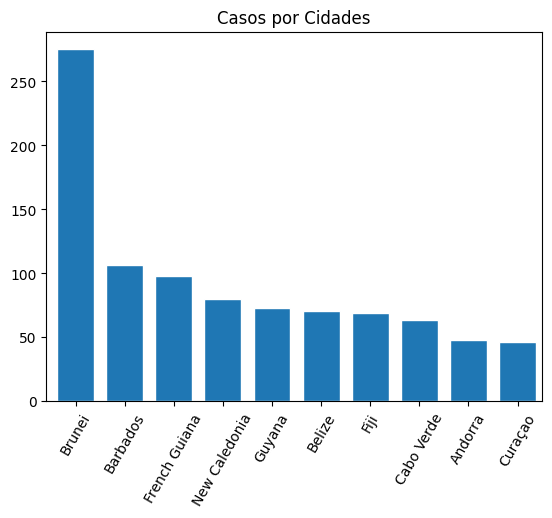

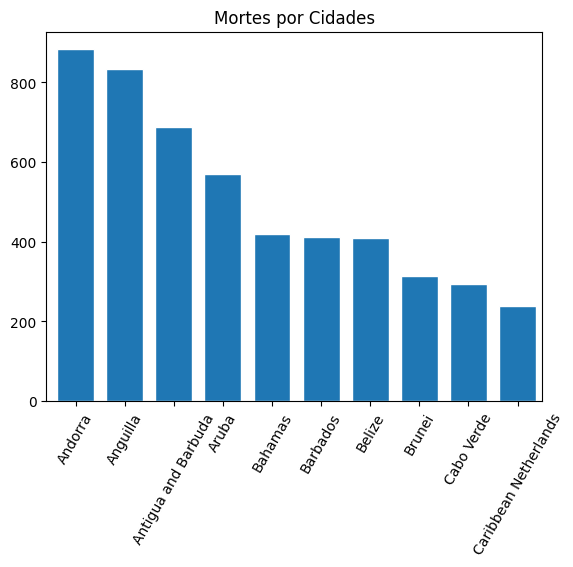

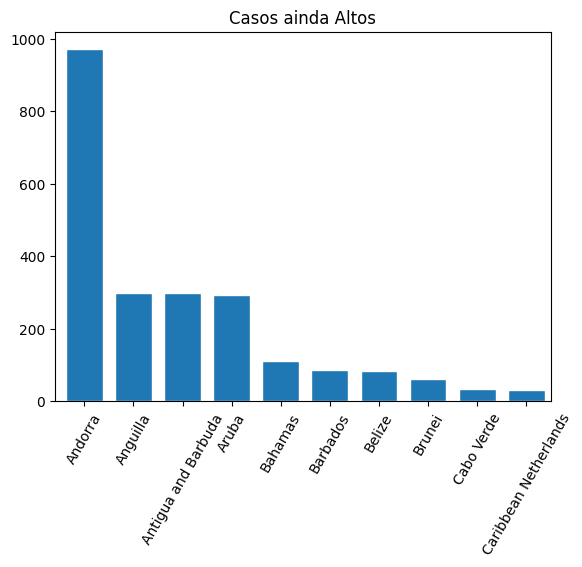

In [15]:
# Aplicar filtros necessários para responder as 3 questões solicitadas acima
fig, ax = plt.subplots()

plt.title("Casos por Cidades")
ax.bar(x=df['Country'], height=df['Total Cases'], edgecolor="white", linewidth=1, width = 1.5/2)
ax.set(xlim=(-0.6, 9.5), xticks=(range(0,10)))
plt.xticks(rotation = 60)
plt.show() #gráfico designado para visualização de casos por cidade, respondendo a primeira pergunta 

fig, ax2 = plt.subplots()
plt.title("Mortes por Cidades")
ax2.bar(x=df['Country'].sort_values(), height=df['Total Deaths'].sort_values(ascending=False), edgecolor="white", linewidth=1, width = 1.5/2)
ax2.set(xlim=(-0.6, 9.5), xticks=(range(0,10)))
plt.xticks(rotation = 60)
plt.show() #gráfico designado para visualização de morte por cidade, respondendo a segunda pergunta

fig2, ax3 = plt.subplots()
plt.title("Casos ainda Altos")
ax3.bar(x=df['Country'].sort_values(), height=df['Active Cases'].sort_values(ascending=False), edgecolor="white", linewidth=1, width = 1.5/2)
ax3.set(xlim=(-0.6, 9.5), xticks=(range(0,10)))
plt.xticks(rotation = 60)
plt.show() #gráfico designado para visualização de casos ainda altos, respondendo a terceira pergunta 
